## Context
The aim of this project is to understand how people talk about healthy living on Instagram. What is associated with the idea of healty living?
I used a tool called Apify to scrape Instagram posts with the hashtags #healthyliving, #healthylifestyle and #wellnessjourney. 

In this jupyter notebook, the csv file containing all the posts will be cleaned and standardized.



### Cleaning and exploring the data


In [4]:
import pandas as pd
import re

In [5]:
# to view the whole posts
pd.set_option('display.max_colwidth', -1)

pd.set_option('display.max_rows', None)

In [6]:
df1 = pd.read_csv("/Users/ana/ironhack_coding/projects/instagram-topic-prediction/datasets/healthyliving.csv")
df2 = pd.read_csv("/Users/ana/ironhack_coding/projects/instagram-topic-prediction/datasets/healthylifestyle.csv")
df3 = pd.read_csv("/Users/ana/ironhack_coding/projects/instagram-topic-prediction/datasets/wellnessjourney.csv")


In [7]:
df1.shape

(5000, 8)

In [8]:
df2.shape

(8134, 8)

In [9]:
df3.shape

(2798, 8)

In [10]:
df2.tail()

,alt,firstComment,imageUrl,likesCount,locationName,ownerUsername,timestamp,url
8129,"Image may contain: one or more people and outdoor, possible text that says 'Leg pain from fibroids: how to get relief'","🔵 Leg Pain From Fibroids: How to Get Relief\n⠀\nThe leg pain that is associated with fibroids is typically due to subserosal (or large intramural) fibroids that are located in the back (posterior) aspect of the uterus. These hard and firm tumors compress the pelvic nerves which may include the sciatic nerve resulting in sciatica pain that is felt in the leg.\n⠀\nIf the symptoms correlate with the location and size of the fibroids, then treating the fibroids should relieve these symptoms. Uterine fibroid embolization (UFE) is an outstanding treatment for getting the relief of fibroid-related symptoms.\n⠀\n🔹If you suspect that you may have uterine fibroids and are not receiving all the answers from your doctor, ask Dr. John Lipman of the Atlanta Fibroid Center for a second opinion. Call to make an appointment: 770-727-2631\n⠀\n#DontLoseUrU🍀",https://scontent-iad3-1.cdninstagram.com/v/t51.2885-15/e35/70254793_417794689096014_2091543836466137290_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com&_nc_cat=106&_nc_ohc=JuOoyqhkbG4AX9Yqrdt&oh=137d94c64ff999db6ea19546649e4e60&oe=5EA3B751,12,NaN,NaN,2019-11-18T11:25:07.000Z,https://www.instagram.com/p/B5AUh_0hBGn
8130,"Image may contain: one or more people, possible text that says 'What are the risks of UFE?'","🔵 From a risk profile, UFE is safer than the surgical options for fibroids treatment. The main risks of the UFE procedure are as follows:\n⠀\n➡️ 1. Menopause: Roughly 2% of women will go into menopause after UFE. The large majority of these women are over 45 years of age. A much smaller percentage of women enter menopause after UFE that are between 40 and 45 years of age. No one under 40 years of age, in our experience, has experienced menopause after UFE treatment.\n⠀\n➡️ 2. Fibroid slough: Roughly 5% of patients will slough fibroid tissue with menses temporarily after UFE. The material is from a fibroid that is near the lining and falls into the cavity and passed in pieces after the UFE. This is not concerning, except that it is important to tell patients about this so that they are not alarmed if they see this after UFE. On very rare occasions (~2-3 per 1,000 patients), the material is in the cavity, but a woman cannot pass it. Symptoms of sudden, sharp pain, fever, and a foul malodorous discharge alert the women of this occurrence and the Interventional Radiologist should be immediately notified. The patient is placed on antibiotic therapy and watched closely for ~24 hours. If she passes the material, no further steps are taken. If she cannot pass the material, an elective outpatient D&C-like procedure with her gynecologist may be necessary to deliver this material. On rare occasions, surgical removal of the offending fibroid or a hysterectomy may be needed.\n⠀\n➡️ 3. Allergy to the contrast: Rarely, patients will be allergic to the x-ray contrast. If this is known from a prior exposure to contrast, the patient will be placed on a steroid regimen beginning the day before the procedure to block this reaction. In the very rare event that a reaction occurs, patients are given medicine to reverse and stop it.\n⠀\n➡️ 4. Undetected cancer: Rarely, cancer can be present in the uterus and is not detected by any test or imaging. (Approximately 1 in 2,000 cases).\n⠀\n⚫ If you would like a second opinion regarding your fibroids before deciding on surgery, make an appointment with Dr. John Lipman by calling the Atlanta Fibroid Center at 770-953-2600.\n⠀\n#DontLoseUrU🍀",https://scontent-iad3-1.cdninstagram.com/v/t51.2885-15/e35/75266918_2722661861131741_6907967573183167977_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com&_nc_cat=101&_nc_ohc=ShPW2fg3FPEAX8Mk2PJ&oh=8b46d3d40ed30b09276adab0698d639e&oe=5E9E3B21,6,NaN,NaN,2019-11-17T11:58:03.000Z,https://www.instagram.com/p/B49zgZGB7LK
8131,Image may

#### Checking Nulll Values

In [11]:

df1.isnull().sum()

alt              316 
firstComment     18  
imageUrl         0   
likesCount       0   
locationName     5000
ownerUsername    5000
timestamp        0   
url              0   
dtype: int64

In [12]:
df2.isnull().sum()

alt              780 
firstComment     84  
imageUrl         0   
likesCount       0   
locationName     8134
ownerUsername    8134
timestamp        0   
url              0   
dtype: int64

In [13]:
df3.isnull().sum()

alt              158 
firstComment     8   
imageUrl         0   
likesCount       0   
locationName     2798
ownerUsername    2798
timestamp        0   
url              0   
dtype: int64

#### Dropping columns

In [14]:
df1.drop(columns = ["alt","locationName", "ownerUsername","imageUrl", "url"],axis=1, inplace = True)
df2.drop(columns = ["alt","locationName", "ownerUsername", "imageUrl", "url"],axis=1, inplace = True)
df3.drop(columns = ["alt","locationName", "ownerUsername", "imageUrl", "url"],axis=1, inplace = True)

#### Concatenating the datasets

In [15]:
#concatenating the datasets
instagram = pd.concat([df1,df2, df3],axis = 0)

In [16]:
# types
instagram.dtypes

firstComment    object
likesCount      int64 
timestamp       object
dtype: object

In [17]:
instagram.isnull().sum()

firstComment    110
likesCount      0  
timestamp       0  
dtype: int64

In [18]:
instagram.shape

(15932, 3)

#### Removing NaN rows

In [19]:
instagram.dropna(subset=["firstComment"], inplace = True)

In [20]:
instagram.isnull().sum()

firstComment    0
likesCount      0
timestamp       0
dtype: int64

In [21]:
instagram.shape

(15822, 3)

#### Creating a column for hashtags

In [22]:
def get_hashtag(s):
    s = s.replace(" ", "")
    return re.findall(r"#([a-z]+)", s, flags=re.IGNORECASE)

In [23]:
instagram["hashtags"] = instagram.firstComment.apply(str).apply(lambda x: get_hashtag(x))

#### Removing hashtags from the body of the post's rows

In [24]:
instagram["post"] = instagram.firstComment.apply(str).str.lower().apply(lambda x: re.sub(r"#([a-z]+)","",x))
                                                 
                                                 

#### Removing duplicate posts

In [25]:
instagram.drop_duplicates(subset="post", inplace= True)

In [26]:
instagram.shape

(13345, 5)

#### Removing any non-character (e.g. emojis)

In [27]:
instagram["post"] = instagram["post"].apply(str).apply(lambda x: re.sub(r'[^A-Za-z ]', "", x))

In [28]:
instagram["post"].head(30)

0     the best offense is a good defense so heres some healthy tips on how to boast your immunity as work through this covid scaredont be scared just take care                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

#### List of hashtags

In [29]:
hashtags = instagram["hashtags"].explode()

In [30]:
hashtags1 = hashtags.value_counts().head(25).index.tolist()
hashtags1

['healthylifestyle',
 'healthyliving',
 'wellnessjourney',
 'healthyfood',
 'fitness',
 'healthy',
 'healthyeating',
 'health',
 'wellness',
 'weightloss',
 'arbonne',
 'nutrition',
 'vegan',
 'weightlossjourney',
 'healthylifestylechange',
 'fitnessmotivation',
 'healthylivingrevolution',
 'healthylifestylecoach',
 'healthylifestyles',
 'healthylifestylechanges',
 'healthandwellness',
 'motivation',
 'healthylifestylechoices',
 'healthylifestylejourney',
 'healthylifestylemovement']

# Visualisation

In [31]:
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
text = ' '.join(hashtags1)

In [33]:
text

'healthylifestyle healthyliving wellnessjourney healthyfood fitness healthy healthyeating health wellness weightloss arbonne nutrition vegan weightlossjourney healthylifestylechange fitnessmotivation healthylivingrevolution healthylifestylecoach healthylifestyles healthylifestylechanges healthandwellness motivation healthylifestylechoices healthylifestylejourney healthylifestylemovement'

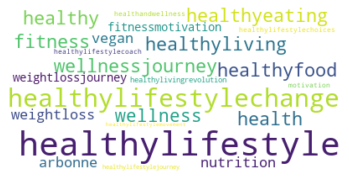

In [34]:

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Cleaned data to csv

In [40]:
instagram.to_csv("/Users/ana/ironhack_coding/projects/instagram-topic-prediction/datasets/instagram.csv")
